In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [3]:
data = pd.read_csv('../data/heart.csv')

In [8]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# def process_categorical_features(categorical_df: pd.DataFrame) -> pd.DataFrame:
#
#     categorical_pipeline = build_categorical_pipeline()
#     return pd.DataFrame(categorical_pipeline.fit_transform(categorical_df).toarray())


# def build_categorical_pipeline() -> Pipeline:
#     categorical_pipeline = Pipeline(
#         [
#             ("impute", SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
#             ("ohe", OneHotEncoder()),
#         ]
#     )
#     return categorical_pipeline


def process_numerical_features(numerical_df: pd.DataFrame) -> pd.DataFrame:
    num_pipeline = build_numerical_pipeline()
    return pd.DataFrame(num_pipeline.fit_transform(numerical_df))


def build_numerical_pipeline() -> Pipeline:
    num_pipeline = Pipeline(
        [("impute", SimpleImputer(missing_values=np.NaN, strategy="mean")),]
    )
    return num_pipeline


def make_features(transformer: ColumnTransformer, df: pd.DataFrame) -> pd.DataFrame:
    return pd.DataFrame(transformer.transform(df).toarray())


def build_transformer(params: None) -> ColumnTransformer:
    transformer = ColumnTransformer(
        [
            # (
            #     "categorical_pipeline",
            #     build_categorical_pipeline(),
            #     params.categorical_features,
            # ),
            (
                "numerical_pipeline",
                build_numerical_pipeline(),
                params,
            ),
        ]
    )
    return transformer

In [9]:
trans = build_transformer(list(data.drop('target', axis=1)))

In [11]:
trans.fit(data)

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                                  'restecg', 'thalach', 'exang', 'oldpeak',
                                  'slope', 'ca', 'thal'])])

In [12]:
list(data)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [ ]:
- "sex"
    - "cp"
    - "trestbps"
    - "chol"
    - "fbs"
    - "restecg"
    - "thalach"
    - "exang"
    - "oldpeak"
    - "slope"
    - "ca"
    - "thal"

In [14]:
data['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

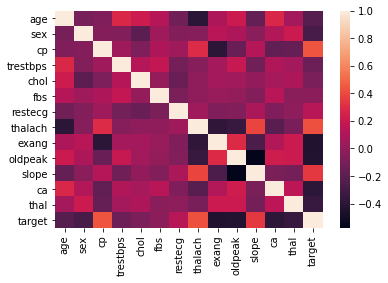

In [7]:
sns.heatmap(data.corr())

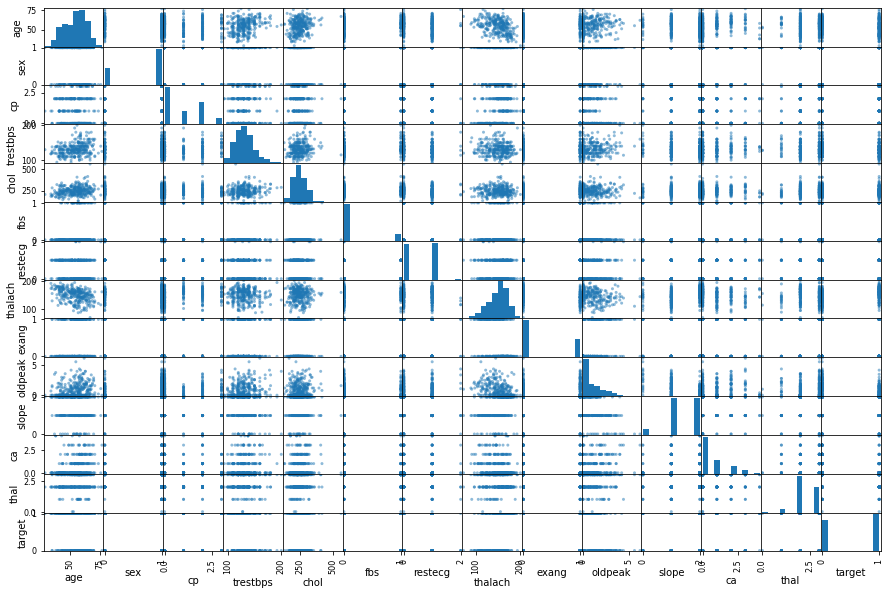

In [13]:
pd.plotting.scatter_matrix(data, figsize=(15,10));

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('target',axis = 1), 
                                                    data['target'], random_state=12345, test_size=.2)

In [19]:
scorer = make_scorer(roc_auc_score, needs_proba=True)

In [93]:
model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=12345, min_samples_split=10)

In [94]:
cv_data = cross_val_score(model, X_train, y_train, scoring=scorer)

In [95]:
cv_data.mean()

0.9260103374885984

In [96]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=10, random_state=12345)

In [97]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.9033333333333333